# PCA

In [ ]:
# !pip install joblib==1.1.0
# !pip install mglearn

In [19]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
import mglearn

In [20]:
wine = load_wine()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(wine.data)

In [21]:
# keep the first two principal components of the data 
pca = PCA(n_components=2) 
# fit PCA model to breast cancer data 
pca.fit(X_scaled) 
# transform data onto the first two principal components 
X_pca = pca.transform(X_scaled) 
print("Original shape: {}".format(str(X_scaled.shape))) 
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (178, 13)
Reduced shape: (178, 2)


Text(0, 0.5, 'Second principal component')

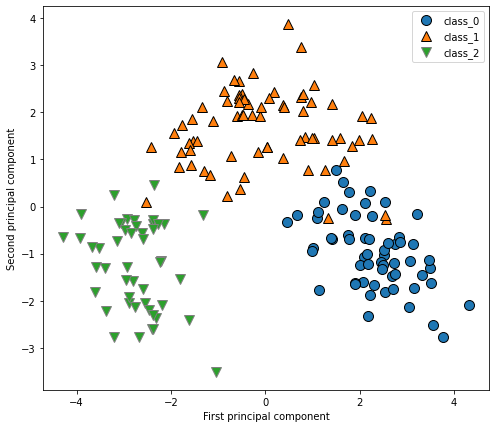

In [22]:
plt.figure(figsize=(8, 8)) 
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], wine.target) 
plt.legend(wine.target_names, loc="best") 
plt.gca().set_aspect("equal") 
plt.xlabel("First principal component") 
plt.ylabel("Second principal component")

Fromthe above figure, now even a linear classifier can do good on the dataset. 

### Downside of PCA
A downside of PCA is that the two axes in the plot are often not very easy to interpret. The principal components correspond to directions in the original data, so they are combinations of the original features. However, these combinations are usually very complex.

PCA component shape: (2, 13)
PCA components:
[[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]]


Text(0, 0.5, 'Principal components')

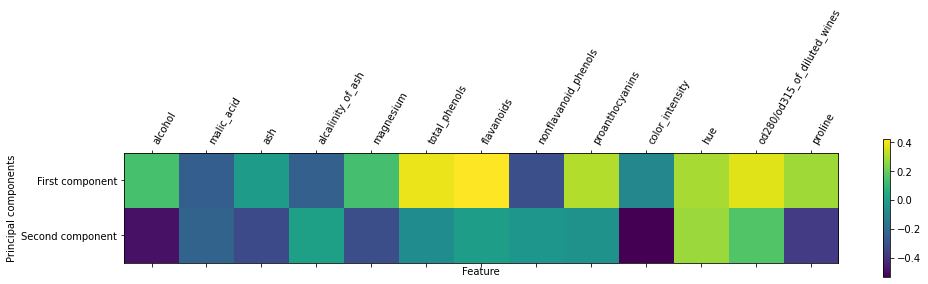

In [23]:
print("PCA component shape: {}".format(pca.components_.shape))
print("PCA components:\n{}".format(pca.components_))
plt.matshow(pca.components_, cmap='viridis') 
plt.yticks([0, 1], ["First component", "Second component"]) 
plt.colorbar() 
plt.xticks(range(len(wine.feature_names)), wine.feature_names, rotation=60, ha='left') 
plt.xlabel("Feature") 
plt.ylabel("Principal components")

In [24]:
X_train, X_test, y_train, y_test = train_test_split( X_pca, wine.target, stratify=wine.target, random_state=66)
logistic = LogisticRegression(C=0.01) #Regularised
model = logistic.fit(X_train, y_train)
print("The acuracy of the model on training dataset is ", model.score(X_train, y_train))
print("The acuracy of the model on testing dataset is ", model.score(X_test, y_test))

The acuracy of the model on training dataset is  0.9774436090225563
The acuracy of the model on testing dataset is  0.9555555555555556


In [25]:
X_train, X_test, y_train, y_test = train_test_split( X_scaled, wine.target, stratify=wine.target, random_state=66)
logistic = LogisticRegression(C=0.01)  #Regularised
model = logistic.fit(X_train, y_train)
print("The acuracy of the model on training dataset is ", model.score(X_train, y_train))
print("The acuracy of the model on testing dataset is ", model.score(X_test, y_test))

The acuracy of the model on training dataset is  0.9924812030075187
The acuracy of the model on testing dataset is  0.9555555555555556


Here model trained on data after decomposed using PCA to lower dimension have less variance compared to model trained on original dataset feature dimension. 